#### Import llibraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### Import data

In [2]:
X_train = pd.read_csv("../Dades/anthropometrics/train.csv")
X_test = pd.read_csv("../Dades/anthropometrics/test.csv")

X_train.head()

,Height,Weight,Sex
0,165.65,35.41,Female
1,148.53,74.45,Female
2,167.04,81.22,Male
3,161.54,71.47,Male
4,174.31,78.18,Male


#### Visualize data

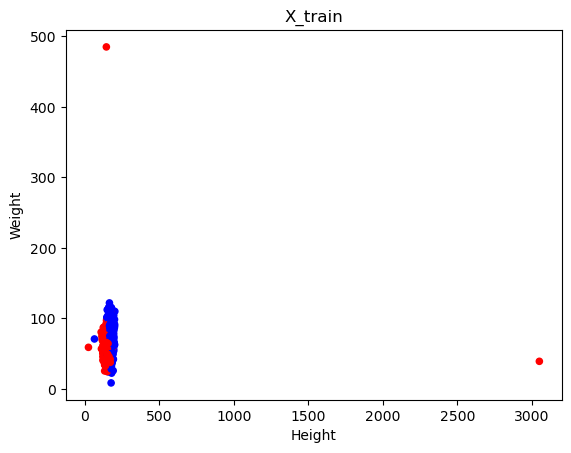

In [3]:
colors = {'Female':'red', 'Male':'blue'}
X_train.plot(kind='scatter', x='Height', y='Weight', c=X_train['Sex'].map(colors), title='X_train')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.show()

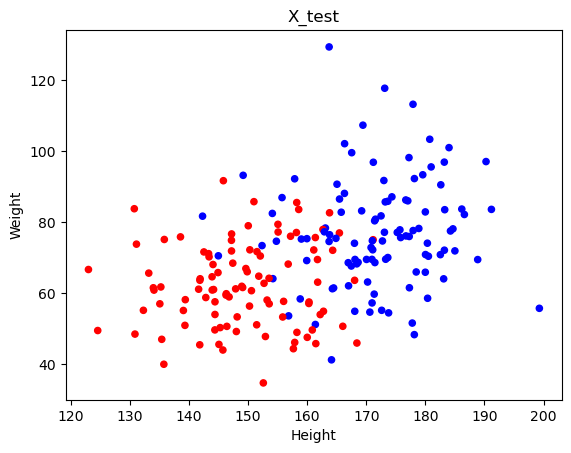

In [4]:
colors = {'Female':'red', 'Male':'blue'}
X_test.plot(kind='scatter', x='Height', y='Weight', c=X_test['Sex'].map(colors), title='X_test')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.show()

#### Delete outliers

In [5]:
cond_1 = X_train[(X_train['Weight'] > 200) | (X_train['Weight'] < 20)]
cond_1

,Height,Weight,Sex
1954,145.79,485.00,Female
2071,177.69,8.53,Male


In [6]:
cond_2 = X_train[(X_train['Height'] > 500) | (X_train['Height'] < 100)]
cond_2

,Height,Weight,Sex
592,3050.00,39.16,Female
1386,25.68,58.99,Female
1996,65.80,70.86,Male


In [7]:
X_train = X_train.drop(cond_1.index.union(cond_2.index))

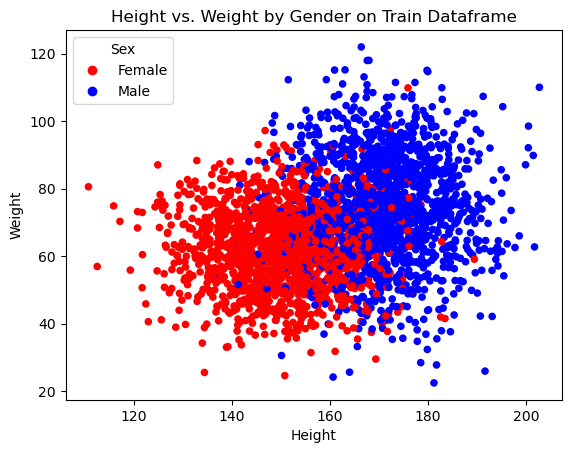

In [8]:
# Define the colors and create the scatter plot
colors = {'Female':'red', 'Male':'blue'}
X_train.plot(kind='scatter', x='Height', y='Weight', c=X_train['Sex'].map(colors), title='Height vs. Weight by Gender on Train Dataframe')
plt.xlabel('Height')
plt.ylabel('Weight')

# Create a legend
legend_labels = ['Female', 'Male']
legend_colors = ['red', 'blue']
legend_handles = [plt.Line2D([0], [0], marker='o', color=color, label=label, linestyle='') for label, color in zip(legend_labels, legend_colors)]
plt.legend(handles=legend_handles, title='Sex')

# Show the plot
plt.show()

#### Change Sex column for numerical values to train NN

In [9]:
X_train = pd.get_dummies(X_train)
X_train.head(3)

,Height,Weight,Sex_Female,Sex_Male
0,165.65,35.41,1,0
1,148.53,74.45,1,0
2,167.04,81.22,0,1


#### Create a NN to predict gender in function of the parameters
1. Problem Statement
2. The Math
3. Code
4. Results

#### Problem Statement:
Tenemos un conjunto de datos con el peso y la altura de diferentes hombres y mujeres, y queremos clasificar si una muestra corresponde a un hombre o a una mujer en función de estos dos datos. Crearemos una red neuronal para ver si pueden ser clasificados. Lo haremos utilizando una capa intermedia oculta, primero con una sola entrada y luego con dos.

#### The Math:
- Weight y bias aleatorios.
- Definir función de activación y de coste.
- **Propagacion hacia delante.** &rarr; obtener el output.
    - Calcular la weighted sum.
    - Evaluar resultat en la funció d'activació.
    - Fer-ho per totes les capes.
- **Backpropagation** &rarr; derivades parcials per veure com afecta cada parametre al error final.
    - Calcular error última capa.
    - Calcular el gradient per el w/b.
    - Fer-ho per les altres capes.
- Optimizar parametros en funció d'un learning rate.
- Repetim

#### Code:

In [10]:
np.random.seed(42)

- Asignamos pesos y sesgos aleatorios:

In [11]:
W_1 = np.random.rand(2, 2)
W_2 = np.random.rand(2, 2)
W_1, W_2

(array([[0.37454012, 0.95071431],
        [0.73199394, 0.59865848]]),
 array([[0.15601864, 0.15599452],
        [0.05808361, 0.86617615]]))

In [12]:
B_1 = np.random.rand(2, 1)
B_2 = np.random.rand(2, 1)
B_1, B_2

(array([[0.60111501],
        [0.70807258]]),
 array([[0.02058449],
        [0.96990985]]))

In [13]:
def act_func(z):
    return 1 / (1 + np.exp(-z))

In [14]:
def deriv_act_func(x):
    return x * (1 - x)

- Tenemos los vectores de entrenamiento (inputs) con los que vamos a entrenar la red neuronal:

In [15]:
X_train[['Height', 'Weight']].head(2)

,Height,Weight
0,165.65,35.41
1,148.53,74.45


In [16]:
inputs = X_train[['Height', 'Weight']].values
inputs

array([[165.65,  35.41],
       [148.53,  74.45],
       [167.04,  81.22],
       ...,
       [162.99,  45.58],
       [154.76,  48.92],
       [185.08,  82.74]])

In [17]:
X_train.head(5)

,Height,Weight,Sex_Female,Sex_Male
0,165.65,35.41,1,0
1,148.53,74.45,1,0
2,167.04,81.22,0,1
3,161.54,71.47,0,1
4,174.31,78.18,0,1


In [18]:
Y = X_train[['Sex_Female', 'Sex_Male']]
Y.head()

,Sex_Female,Sex_Male
0,1,0
1,1,0
2,0,1
3,0,1
4,0,1


In [19]:
Y = Y.values

In [20]:
Y[0]

array([1, 0], dtype=uint8)

- Example of forward pass for the first iteration:

In [21]:
inputs[0], W_1, B_1

(array([165.65,  35.41]),
 array([[0.37454012, 0.95071431],
        [0.73199394, 0.59865848]]),
 array([[0.60111501],
        [0.70807258]]))

In [22]:
inputs[0].shape, W_1.shape, B_1.shape

((2,), (2, 2), (2, 1))

In [23]:
Z_1 = np.dot(W_1, inputs[0]) + B_1.T
Z_1

array([[ 96.30847929, 143.16136596]])

In [24]:
Z_1[0]

array([ 96.30847929, 143.16136596])

In [25]:
a_1 = np.array([act_func(valor) for valor in Z_1[0]])
a_1.reshape(2,1).T

array([[1., 1.]])

- Second layer

In [26]:
a_2 = np.array([act_func(valor) for valor in np.dot(W_2, a_1) + B_2.T[0]])
a_2.reshape(2,1).T

array([[0.58239129, 0.86923022]])

```python
def compute(W, B, inputs):
    # Comprobación de dimensiones
    if W.shape[1] != inputs.shape[0]:
        raise ValueError("Las dimensiones de W y inputs no son compatibles para multiplicación.")
    if B.shape[0] != W.shape[0]:
        raise ValueError("Las dimensiones de B y W no son compatibles para suma.")
    
    # Realizar la multiplicación y suma
    resultado = np.dot(W, inputs) + B
    
    return resultado
```

#### Calcular les derivades parcials (gradients) de cada pes i biaix:

In [27]:
# Error comès a la segona i primera capa: 
a_2 - Y[0]

array([-0.41760871,  0.86923022])

In [28]:
Z_2 = np.dot(W_2, a_1) + B_2.T
Z_2

array([[0.33259766, 1.89416961]])

In [29]:
dE_2 = (a_2 - Y[0]) * deriv_act_func(Z_2)
dE_2

array([[-0.0926993 , -1.47222295]])

In [30]:
dE_1 = W_2.T * dE_2
dE_1

array([[-0.01446282, -0.08551203],
       [-0.01446058, -1.2752044 ]])

In [31]:
# Calcular gradients:
dB_2 = dE_2
dB_1 = dE_1

dW_2 = dE_2 *a_1.T
dW_1 = dE_1 *inputs[0].T

#### Update Weights

In [32]:
W_1 = W_1 - (0.1 * dW_1)
B_1 = B_1 - (0.1 * dB_1)

W_2 = W_2 - (0.1 * dW_2)
B_2 = B_2 - (0.1 * dB_2)

#### Repeat

In [33]:
def init_params():
    W1 = np.random.rand(2, 2) - 0.5
    b1 = np.random.rand(2, 1) - 0.5
    W2 = np.random.rand(2, 2) - 0.5
    b2 = np.random.rand(2, 1) - 0.5
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A
    
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def ReLU_deriv(Z):
    return Z > 0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2

def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [34]:
W1, b1, W2, b2 = gradient_descent(inputs, Y, 0.10, 500)

ValueError: shapes (2,2) and (2995,2) not aligned: 2 (dim 1) != 2995 (dim 0)

In [ ]:
W1, b1, W2, b2

#### Test

#### Tensorflow
- https://www.youtube.com/watch?v=qTNUbPkR2ao